In [1]:
%matplotlib inline
from pylab import *
import cv2
from glob import glob
from image_defs import *
import os

In [3]:
board_picture_folder="Images/2024-12-5 - training board images"
square_images_folder="Images/2024-12-5 - training squares"
image_to_use_for_corners="Images/2024-12-5 - training board images/demopic2.jpg"

corners= array([[89., 39.], 
                 [1105., 23.], 
                 [1198., 590.], 
                 [6., 593.]], dtype=float32) 

In [5]:
board_filenames=sorted(glob(board_picture_folder+"/*.jpg"))
print(len(board_filenames))

8


## Look at all the boards

demopic1.jpg
demopic2.jpg
demopic3.jpg
demopic4.jpg
demopic5.jpg
demopic6.jpg
demopic7.jpg
demopic8.jpg


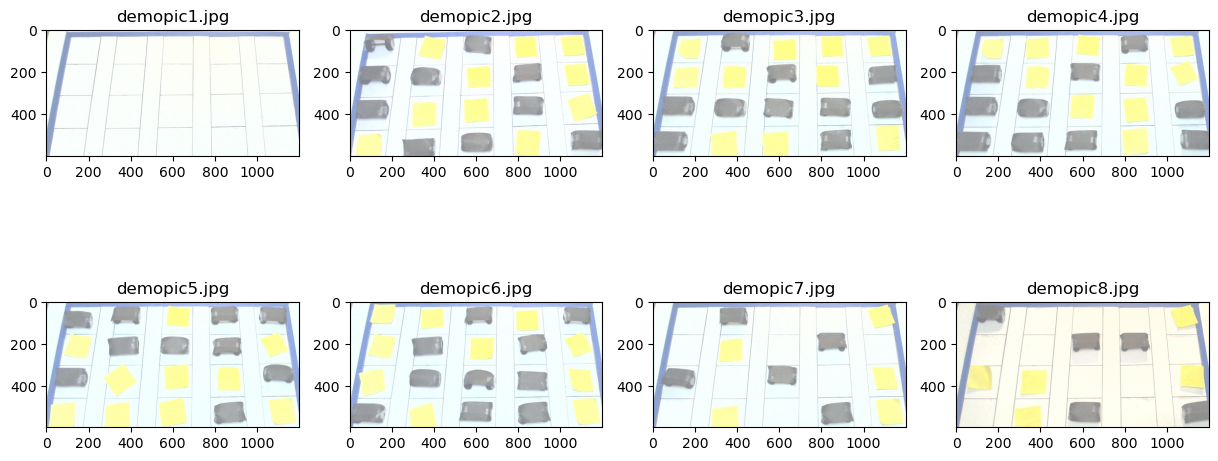

In [8]:
count=1
figure(figsize=(15,10))
for filename in board_filenames:
    subplot(3,4,count)

    image=imread(filename)
    image=image[300:900,:1200]  
    
    imshow(image)

    
    base,name=os.path.split(filename)
    title(name)
    print(name)
    count+=1

In [9]:
board_states={
    'demopic1.jpg': '00000/00000/00000/00000',
     'demopic2.jpg': '12122/11212/12212/21121',
     'demopic3.jpg': '21222/22121/11111/12212',
     'demopic4.jpg': '22212/12122/11221/11121',
     'demopic5.jpg': '11211/21112/12221/22212',
     'demopic6.jpg': '22121/21212/21112/12112',
     'demopic7.jpg': '01002/02010/10102/02012',
     'demopic8.jpg': '10002/00110/22002/02101',
}

In [10]:
from Game import *

Version:  0.3.09


Images/2024-12-5 - training board images/demopic1.jpg 00000/00000/00000/00000
Images/2024-12-5 - training squares/piece_0/square0_0.jpg
Images/2024-12-5 - training squares/piece_0/square1_0.jpg
Images/2024-12-5 - training squares/piece_0/square2_0.jpg
Images/2024-12-5 - training squares/piece_0/square3_0.jpg
Images/2024-12-5 - training squares/piece_0/square4_0.jpg
Images/2024-12-5 - training squares/piece_0/square5_0.jpg
Images/2024-12-5 - training squares/piece_0/square6_0.jpg
Images/2024-12-5 - training squares/piece_0/square7_0.jpg
Images/2024-12-5 - training squares/piece_0/square8_0.jpg
Images/2024-12-5 - training squares/piece_0/square9_0.jpg
Images/2024-12-5 - training squares/piece_0/square10_0.jpg
Images/2024-12-5 - training squares/piece_0/square11_0.jpg
Images/2024-12-5 - training squares/piece_0/square12_0.jpg
Images/2024-12-5 - training squares/piece_0/square13_0.jpg
Images/2024-12-5 - training squares/piece_0/square14_0.jpg
Images/2024-12-5 - training squares/piece_0/squ

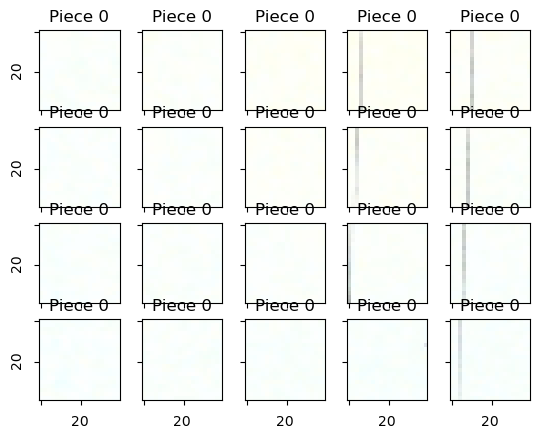

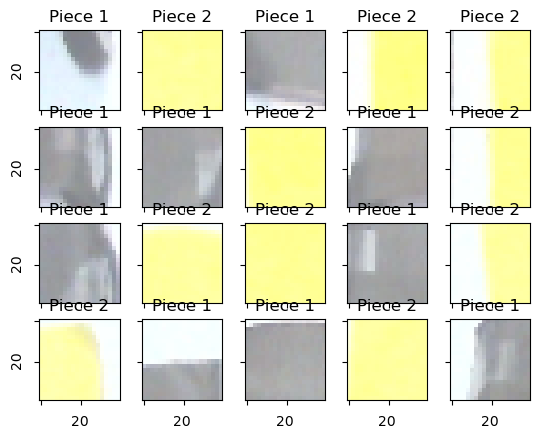

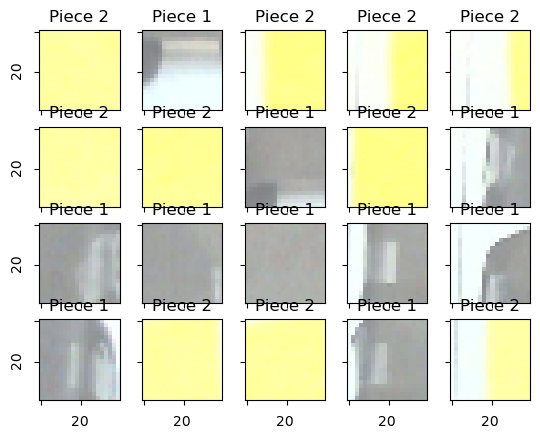

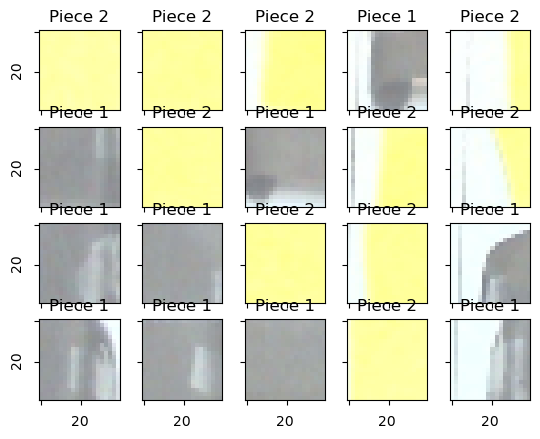

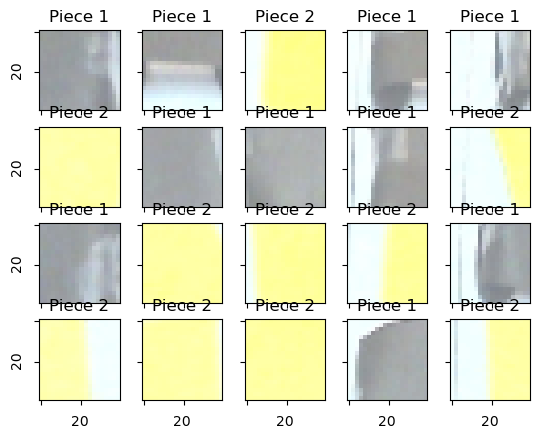

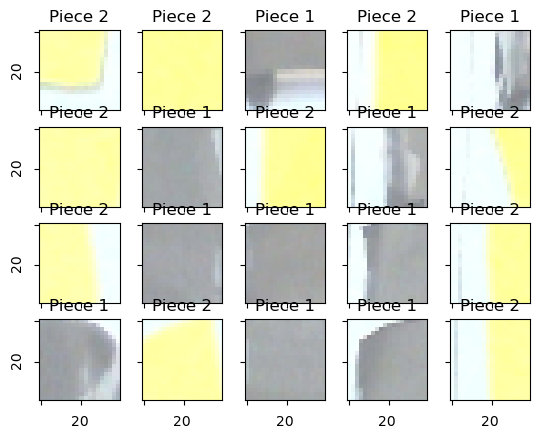

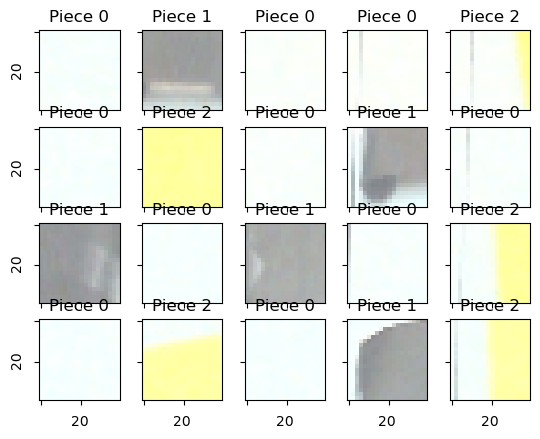

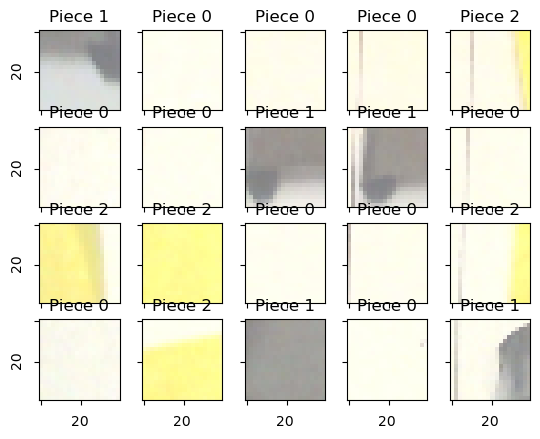

In [11]:
count=0
for name in board_states:
    filename=board_picture_folder+"/"+name
    board_string=board_states[name]
    
    state=Board(board_string)
    print(filename,board_string)
    image=imread(filename)

    # these 5 lines are specific to your image
    image=image[300:900,:1200]
    im3=straighten_image(image,corners)

    squares=get_board_squares_from_image(im3,
                                     state.shape,
                                     middle_pixels=20)  # <=== check this
    


    if not os.path.exists(square_images_folder):
        print(f"Making folder {square_images_folder}")
        os.mkdir(square_images_folder)
    
    
    nr,nc=state.shape
    saveit=True

    figure()
    plot_count=0
    for r in range(nr):
        for c in range(nc):
    
            subplot(nr,nc,plot_count+1)
            imshow(squares[plot_count])
    
            shape=squares[plot_count].shape
            piece=state.board[plot_count]
            
            title(f"Piece {piece}")
            if c==0:
                ylabel(shape[0])
    
            if r==nr-1:
                xlabel(shape[1])
            gca().set_xticklabels([])
            gca().set_yticklabels([])
    
    
            if saveit:
                piece_folder=f"{square_images_folder}/piece_{piece}"
                if not os.path.exists(piece_folder):
                    print(f"Making folder {piece_folder}")
                    os.mkdir(piece_folder)
                
                fname=f"{piece_folder}/square{count}_{piece}.jpg"
                print(fname)
                imsave(fname,squares[plot_count])
            
            
            plot_count+=1  
            count+=1